In [1]:
import pandas as pd

# 读取数据
file_path = r"D:\github_bot_raw_data.csv"  # 使用 r 表示原始字符串，避免转义问题
data = pd.read_csv(file_path)

# 显示去重前的数据量
print(f"去重前数据量: {data.shape[0]}")

# 删除重复数据
data_deduplicated = data.drop_duplicates()

# 显示去重后的数据量
print(f"去重后数据量: {data_deduplicated.shape[0]}")

# 如果需要保存去重后的数据
output_path = r"D:\github_bot_cleaned_data.csv"
data_deduplicated.to_csv(output_path, index=False)

print(f"去重后的数据已保存到: {output_path}")


去重前数据量: 20358
去重后数据量: 19779
去重后的数据已保存到: D:\github_bot_cleaned_data.csv


In [2]:
import pandas as pd

# 读取数据
file_path = r"D:\github_bot_raw_data.csv"
data = pd.read_csv(file_path)

# 1. 去掉 `gravatar_id` 列
if 'gravatar_id' in data.columns:
    data.drop(columns=['gravatar_id'], inplace=True)
    print("已删除 gravatar_id 列")
else:
    print("gravatar_id 列不存在")

# 查看各列的缺失值情况
print("\n各列缺失值情况（删除 gravatar_id 列后）：")
print(data.isnull().sum())

# 2. 将可转化为布尔变量的列转化为布尔类型
# 假设这些列可以为布尔类型，如 'has_company', 'has_location' 等
bool_columns = ['company', 'location']  # 根据实际列名调整
for col in bool_columns:
    if col in data.columns:
        data[col] = data[col].notnull()  # 有值为 True，无值为 False
        print(f"已将 {col} 列转为布尔类型")

# 3. 填充文本数据的空值为空字符串
text_columns = data.select_dtypes(include=['object']).columns
data[text_columns] = data[text_columns].fillna('')

# 再次查看各列缺失值情况
print("\n各列缺失值情况（处理后）：")
print(data.isnull().sum())

# 保存处理后的数据
output_path = r"D:\github_bot_cleaned_data.csv"
data.to_csv(output_path, index=False)
print(f"\n处理后的数据已保存到: {output_path}")


已删除 gravatar_id 列

各列缺失值情况（删除 gravatar_id 列后）：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at               

In [3]:
import pandas as pd

# 读取数据
file_path = r"D:\github_bot_raw_data.csv"
data = pd.read_csv(file_path)

# 查看初始数据类型
print("转换前的数据类型：")
print(data.dtypes)

# 1. 将 `created_at` 和 `updated_at` 转换为时间戳
timestamp_columns = ['created_at', 'updated_at']
for col in timestamp_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')  # 转换为日期时间格式
        data[col] = data[col].astype('int64') // 10**9  # 转换为 Unix 时间戳
        print(f"{col} 列已转换为时间戳")
    else:
        print(f"{col} 列不存在，跳过转换")

# 查看转换后的数据类型
print("\n转换后的数据类型：")
print(data.dtypes)

# 保存处理后的数据
output_path = r"D:\github_bot_transformed_data.csv"
data.to_csv(output_path, index=False)
print(f"\n处理后的数据已保存到: {output_path}")


转换前的数据类型：
actor_id                 int64
label                   object
login                   object
id                       int64
node_id                 object
avatar_url              object
gravatar_id            float64
url                     object
html_url                object
followers_url           object
following_url           object
gists_url               object
starred_url             object
subscriptions_url       object
organizations_url       object
repos_url               object
events_url              object
received_events_url     object
type                    object
site_admin                bool
name                    object
company                 object
blog                    object
location                object
email                   object
hireable                object
bio                     object
twitter_username        object
public_repos             int64
public_gists             int64
followers                int64
following                int6

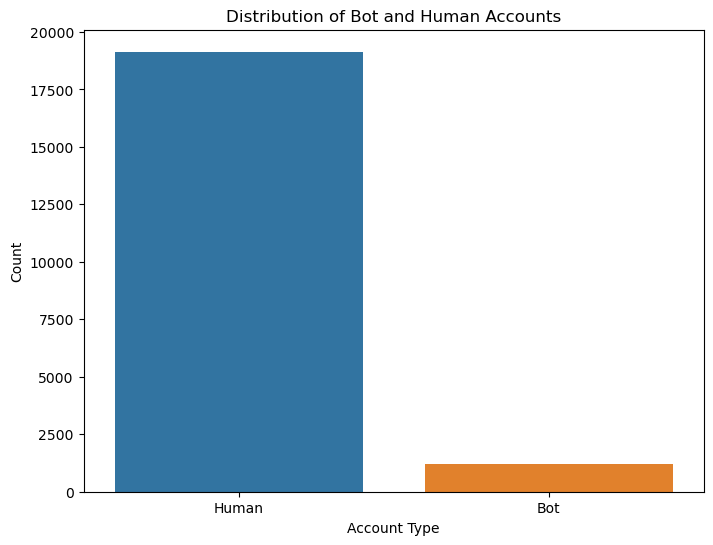

In [9]:
#4.数据可视化
# 4.1 可视化 `bot` 和 `human` 类型账号数量情况

#条形图：条形图适合用于展示分类数据的分布情况。通过条形图对比 `bot` 和 `human` 类型账号的数量分布，可以直观地了解数据集的结构。

#结果分析：数据显示 `human` 类型用户明显多于 `bot` 类型用户，表明 GitHub 平台主要由 `human` 用户组成，而 `bot` 账号占比较小。

#数据洞察：大多数用户是 `human` 类型，这符合平台用户特征。若 `bot` 类型数量较多，可能需要进一步分析是否存在异常用户行为或自动化操作比例较高的情况。

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('D:\github_bot_raw_data.csv')

data = data.drop(columns=['gravatar_id'])

bool_columns = ['company', 'location', 'email', 'hireable']
for col in bool_columns:
    data[col] = data[col].notnull()

text_columns = ['name', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Distribution of Bot and Human Accounts")
plt.xlabel("Account Type")
plt.ylabel("Count")
plt.show()


D:\aaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


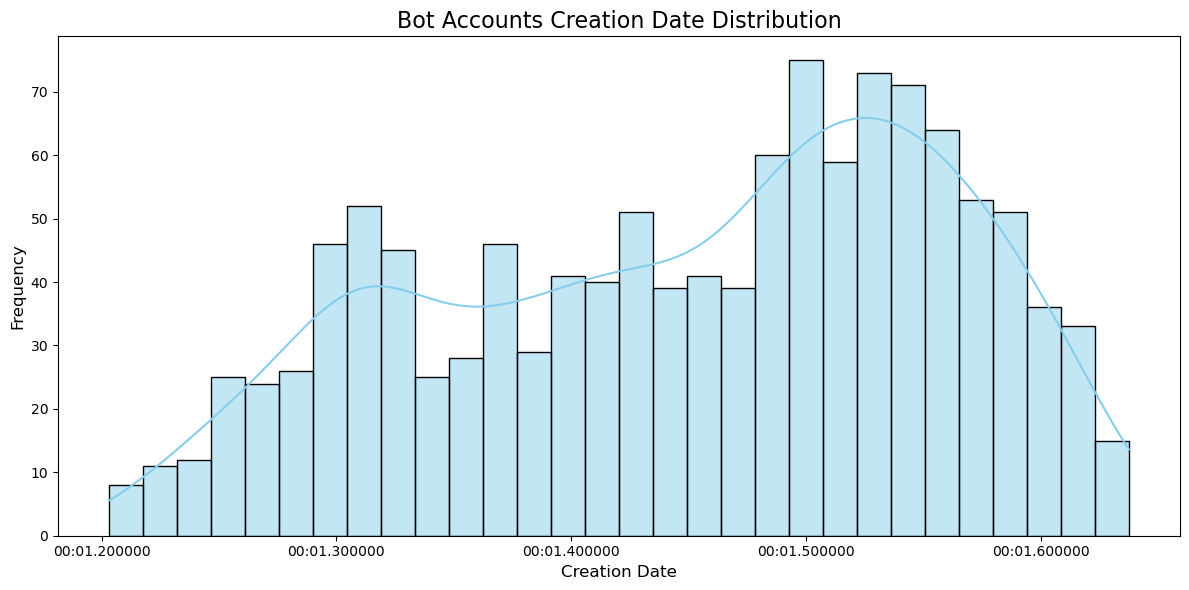

In [14]:
#4.2 可视化 `bot` 类型账号的 `created_at` 分布情况

#柱状图：柱状图可以有效展示数据在时间维度上的分布情况。用于分析 `bot` 账号创建的趋势，了解是否存在特定时期大量注册的情况。

#结果分析： `bot` 类型账号在某一时间段突然激增，这可能表明该时期存在自动化工具的集中部署，或某些自动化任务在该时间段集中增加，但近来降低。

#数据洞察：观察 `bot` 账号的创建时间分布，有助于了解 GitHub 平台上自动化操作的增长趋势，并为安全监控提供信息，尤其是若发现异常波动可能提示自动化账户激增的时间段。


import numpy as np

# 将 'created_at' 列中的 inf 值替换为 NaN
bot_data['created_at'] = pd.to_datetime(bot_data['created_at'], errors='coerce')

# 替换 'inf' 和 '-inf' 值为 NaN
bot_data['created_at'] = bot_data['created_at'].replace([np.inf, -np.inf], np.nan)

# 删除 NaN 值
bot_data = bot_data.dropna(subset=['created_at'])

# 绘制柱状图
plt.figure(figsize=(12, 6))
sns.histplot(bot_data['created_at'], kde=True, bins=30, color='skyblue')

# 添加标题和坐标轴标签
plt.title("Bot Accounts Creation Date Distribution", fontsize=16)
plt.xlabel("Creation Date", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 显示图表
plt.tight_layout()
plt.show()


D:\aaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


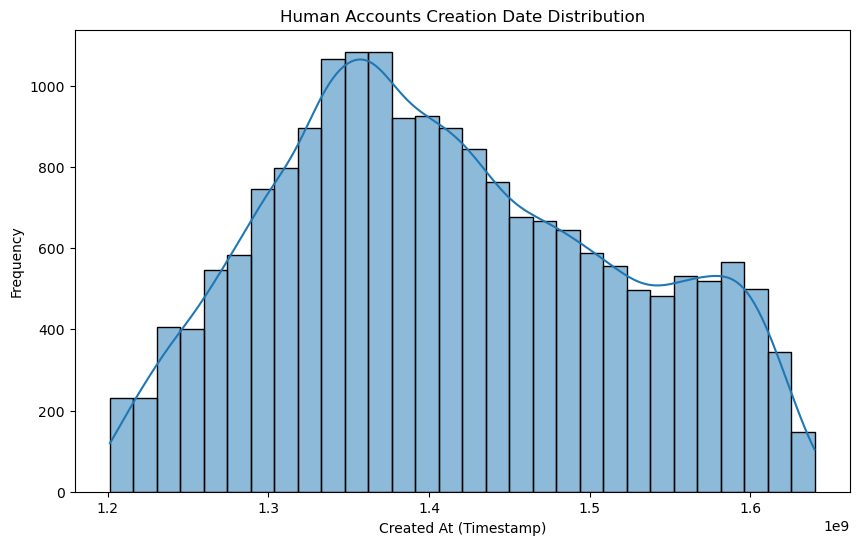

In [15]:
# 4.3 可视化 `human` 类型账号的 `created_at` 分布情况

#时间序列图：时间序列图适合展示 `human` 用户创建账号的长期趋势，尤其适合分析平台用户活跃度和增长的变化。

#结果分析：人类用户的账号注册量稳步上升，但近两年注册量逐渐降低，这可能反映出 GitHub 作为开发者平台的流行度下降（。

#数据洞察：此图表帮助了解平台用户基数增长的趋势，以及开发者社区的增长速度。可为 GitHub 提供未来用户增长预测的依据。

human_data = data[data['label'] == 'Human']

plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], kde=True, bins=30)
plt.title("Human Accounts Creation Date Distribution")
plt.xlabel("Created At (Timestamp)")
plt.ylabel("Frequency")
plt.show()


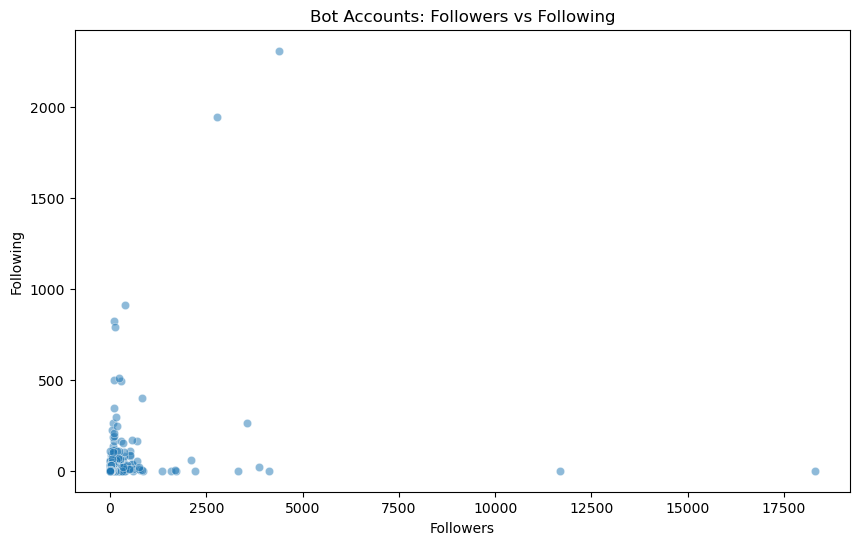

In [16]:
# 4.4 可视化 `bot` 类型账号的 `followers` 和 `following` 分布情况

#散点图：散点图可以显示 `followers` 和 `following` 之间的关系，箱线图则适合展示这两个数值的分布范围和极端值，帮助分析 `bot` 账号的粉丝和关注量分布。

#结果分析：大部分 `bot` 类型账号的 `followers` 和 `following` 较低，但部分异常 `bot` 账号的 `followers` 较高。这可能表示部分 `bot` 账号通过自动关注或关注回粉策略积累粉丝。

#数据洞察：分析 `bot` 账号的粉丝和关注量，可以帮助识别异常的 `bot` 活动（如恶意营销），以及理解平台中常规 `bot` 账号的行为模式。


plt.figure(figsize=(10, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', alpha=0.5)
plt.title("Bot Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

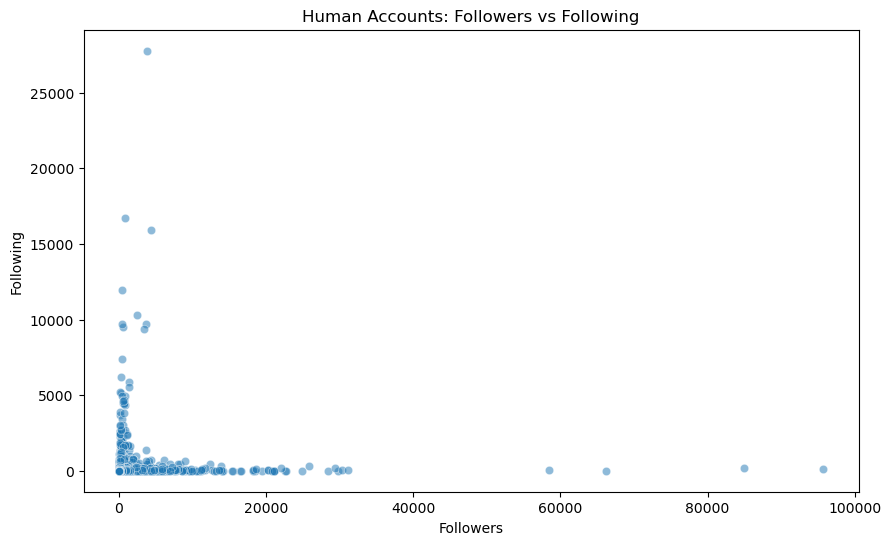

In [17]:
# 4.5 可视化 `human` 类型账号的 `followers` 和 `following` 分布情况

#散点图：`human` 用户在 `followers` 和 `following` 上可能存在更大的差异，特别是影响力较大的用户可能拥有极高的粉丝数，而部分用户关注数较少。

#结果分析：大多数 `human` 用户的 `followers` 和 `following` 较低，但一些用户 `followers` 极高，表明 `human` 用户群体中存在少数高影响力账号。

#数据洞察：理解 `human` 用户的粉丝和关注量分布，有助于识别 GitHub 社区中活跃度较高或影响力较大的用户群体。这些信息对社群构建、内容分发等方面具有重要意义。

plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.5)
plt.title("Human Accounts: Followers vs Following")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()
